In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import random
import scipy
import scanpy as sc
import scvi
import os
import sklearn.cluster as cluster
import scdrs

sc.set_figure_params(figsize=(4, 4))

In [42]:
adata = sc.read_h5ad("/project2/gilad/jpopp/ebQTL/data/single_cell_objects/highpass/cellid_annotated_sketch.h5ad")

In [43]:
adata

AnnData object with n_obs × n_vars = 50000 × 5000
    obs: 'sample_id', 'Collection.Date', 'Lane', 'Sample.ID', 'cDNA.amp.cycles', 'cDNA.total.yield', 'library.prep.batch', 'Sequencing.batch', 'col.group', 'donor_id_x', 'prob_max', 'prob_doublet', 'n_vars', 'best_singlet', 'best_doublet', 'doublet_logLikRatio', 'Line.True', 'Line.StockLabel', 'contaminated', 'swapped', 'Feeder.passage', 'Feeder.Free.passage', 'sex', 'Formation.replicate', 'collection.replicate', 'formation.date', 'visual.confluence', 'total.cells.per.lane..correct.', 'X..Viable..based.on.average.of.two.counts.', 'days.maintained.in.LD.prior.to.formation', 'who.dissociated.the.lines.for.formation', 'cell.counter.correction', 'comments', 'collection.date', 'collection.group.label', 'EB.appearance.notes', 'dissociated.by.', 'approx..time.in.accumax..in.minutes.', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', '_scvi_local_l_mean', '_scvi_local_l_var', 'Z_0', 'Z_1', 

In [44]:
scran_norm = sc.read_h5ad("/project2/gilad/ktayeb/ebqtl-workflowr/output/proc/EB_high_pass_filtered_normalized.h5ad")

In [45]:
scran_sub = scran_norm[adata.obs_names]

## scDRS Analysis for Atrial Fibrillation (AF)

In [13]:
scdrs.preprocess(scran_sub)

Trying to set attribute `._uns` of view, copying.


In [14]:
df_gs = scdrs.util.load_gs("/project2/gilad/jpopp/ebQTL/data/scDRS/gs_files/zhang.magma_10kb_1000.74_traits.gs")

In [17]:
af_gene_list = df_gs['PASS_AtrialFibrillation_Nielsen2018'][0]
af_gene_weight = df_gs['PASS_AtrialFibrillation_Nielsen2018'][1]

In [20]:
af_res = scdrs.score_cell(scran_sub, af_gene_list, gene_weight=af_gene_weight, n_ctrl=20)

Computing control scores: 100%|██████████| 20/20 [00:30<00:00,  1.52s/it]


In [22]:
adata.obs['AF_scdrs'] = af_res['norm_score']

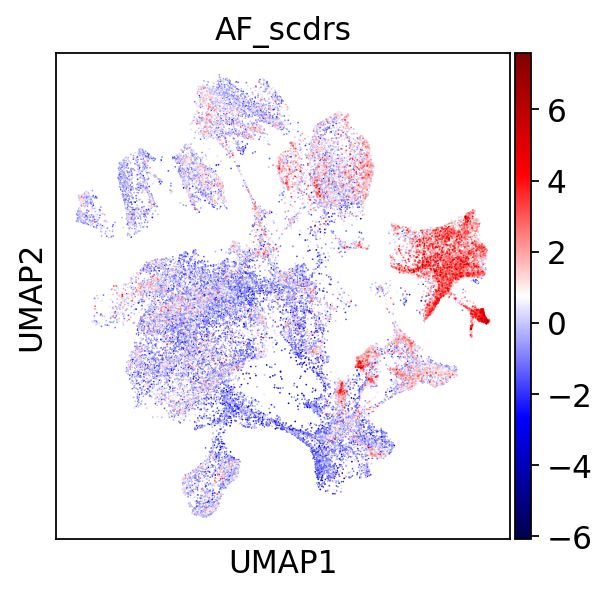

In [25]:
sc.pl.umap(adata, color='AF_scdrs', cmap="seismic")

## scDRS Analysis for Schizophrenia (SCZ)

In [26]:
scz_gene_list = df_gs['PASS_Schizophrenia_Pardinas2018'][0]
scz_gene_weight = df_gs['PASS_Schizophrenia_Pardinas2018'][1]

In [27]:
scz_res = scdrs.score_cell(scran_sub, scz_gene_list, gene_weight=scz_gene_weight, n_ctrl=20)

Computing control scores: 100%|██████████| 20/20 [00:29<00:00,  1.50s/it]


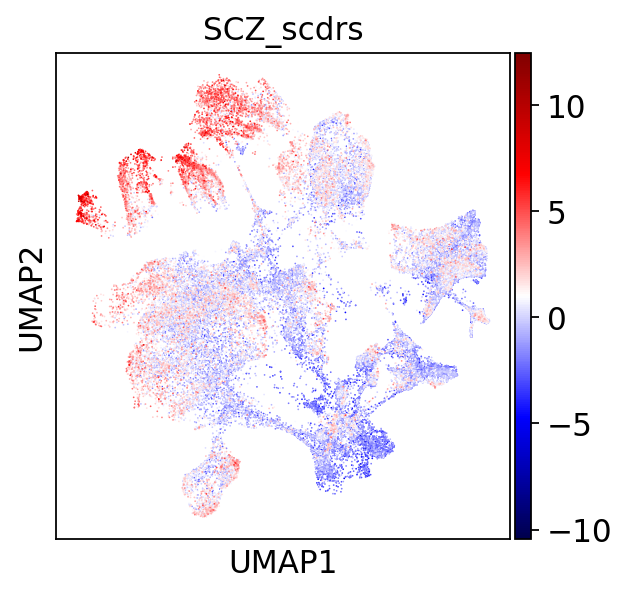

In [29]:
adata.obs['SCZ_scdrs'] = scz_res['norm_score']
sc.pl.umap(adata, color='SCZ_scdrs', cmap="seismic")

## scDRS Analysis for Forced Expiratory Volume (FEV)

In [30]:
fev_gene_list = df_gs['UKB_460K.lung_FEV1FVCzSMOKE'][0]
fev_gene_weight = df_gs['UKB_460K.lung_FEV1FVCzSMOKE'][1]

In [31]:
fev_res = scdrs.score_cell(scran_sub, fev_gene_list, gene_weight=fev_gene_weight, n_ctrl=20)

Computing control scores: 100%|██████████| 20/20 [00:31<00:00,  1.58s/it]


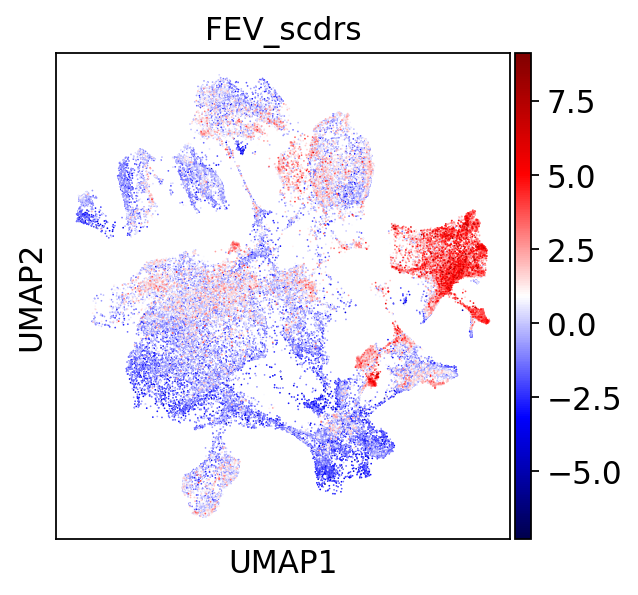

In [32]:
adata.obs['FEV_scdrs'] = fev_res['norm_score']
sc.pl.umap(adata, color='FEV_scdrs', cmap="seismic")

## scDRS Analysis for HDL

In [33]:
hdl_gene_list = df_gs['UKB_460K.biochemistry_HDLcholesterol'][0]
hdl_gene_weight = df_gs['UKB_460K.biochemistry_HDLcholesterol'][1]

In [34]:
hdl_res = scdrs.score_cell(scran_sub, hdl_gene_list, gene_weight=hdl_gene_weight, n_ctrl=20)

Computing control scores: 100%|██████████| 20/20 [00:31<00:00,  1.56s/it]


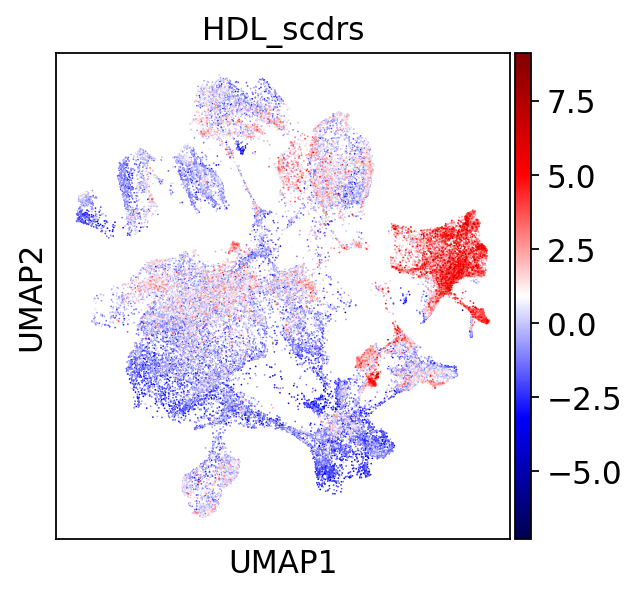

In [35]:
adata.obs['HDL_scdrs'] = fev_res['norm_score']
sc.pl.umap(adata, color='HDL_scdrs', cmap="seismic")

## scDRS Analysis for LDL

In [36]:
ldl_gene_list = df_gs['UKB_460K.biochemistry_LDLdirect'][0]
ldl_gene_weight = df_gs['UKB_460K.biochemistry_LDLdirect'][1]

In [37]:
ldl_res = scdrs.score_cell(scran_sub, ldl_gene_list, gene_weight=ldl_gene_weight, n_ctrl=20)

Computing control scores: 100%|██████████| 20/20 [00:30<00:00,  1.54s/it]


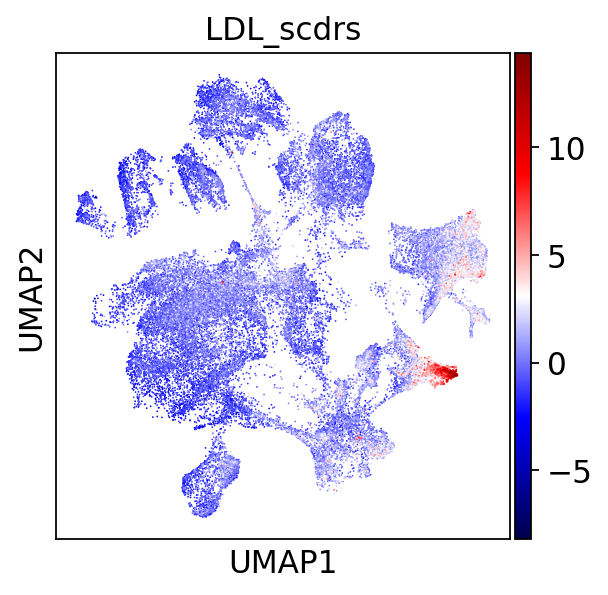

In [38]:
adata.obs['LDL_scdrs'] = ldl_res['norm_score']
sc.pl.umap(adata, color='LDL_scdrs', cmap="seismic")

## Pseudotime and Disease Relevance

In [ ]:
sc.tl.diffmap(adata)

In [ ]:
sc